In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas
import seaborn

import datetime
from datetime import datetime
import time

import datetime_white_oaks_functions as WOfunc

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import logs and concatenate the 2019 and 2020 Williamstown data.
df_2019=pandas.read_csv('2019_parsed_logs.csv')
df_2020=pandas.read_csv('2020_parsed_logs.csv')
df = pandas.concat([df_2019, df_2020])

## Shift type

In [3]:
#convert to datetime
df['Call_Date_and_Time'] = pandas.to_datetime(df['call_datetime'])

#append a shift number column
shiftnumber=np.zeros(df.shape[0])
for i in range (df.shape[0]):
    shiftnumber[i]=WOfunc.shift_number(df.iloc[i]['Call_Date_and_Time'])
df['Shift_Number'] = shiftnumber

## White Oaks

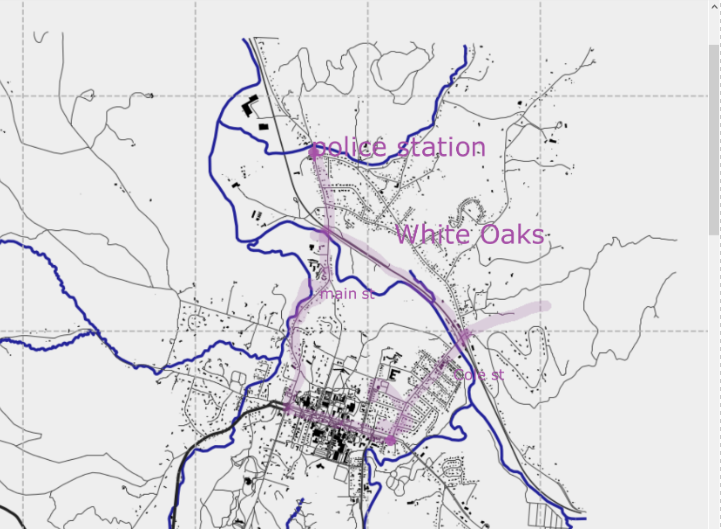

In [4]:
#manually enter streets in White Oaks neighborhood 
WhiteOaksStreets=['MAY STREET', 'HENDERSON ROAD', 'CHESTNUT STREET','BIRCH LANE','WALNUT STREET','SWEET FARN ROAD','CUMMINGS AVENUE','PINE LODGE PARK PLACE','N HOOSAC ROAD','SUMMER STREET','BRIDGES ROAD','LINDLEY TERRACE','SAND SPRINGS ROAD','MC CLAIN COURT', 'MOUNTAIN VIEW STREET']
WhiteOaksStreets.sort()

In [5]:
#create a White Oaks dataframe by taking rows where the street is in White Oaks
WhiteOaksdf=df[df['street'].isin(WhiteOaksStreets)]

#get a percentage of logs: almost 11%
print('Percentage of logs in White Oaks: '+str(100*WhiteOaksdf.shape[0]/df.shape[0]))

Percentage of logs in White Oaks: 10.85474832130055


In [6]:
#create a dataframe by taking rows where the street is not in White Oaks
NotWhiteOaksdf=df[df['street'].isin(WhiteOaksStreets)==False]

print('Percentage of logs not in White Oaks: '+str(100*NotWhiteOaksdf.shape[0]/df.shape[0]))

Percentage of logs not in White Oaks: 89.14525167869945


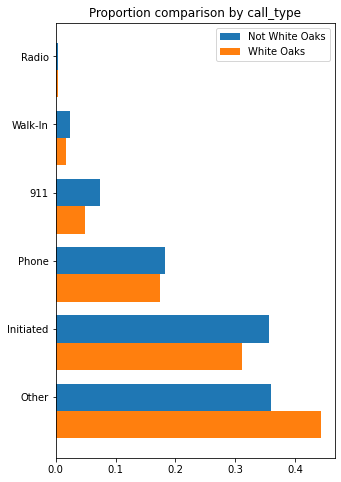

In [18]:
WOfunc.percentage_bar_chart(df,WhiteOaksdf,NotWhiteOaksdf,'call_type');

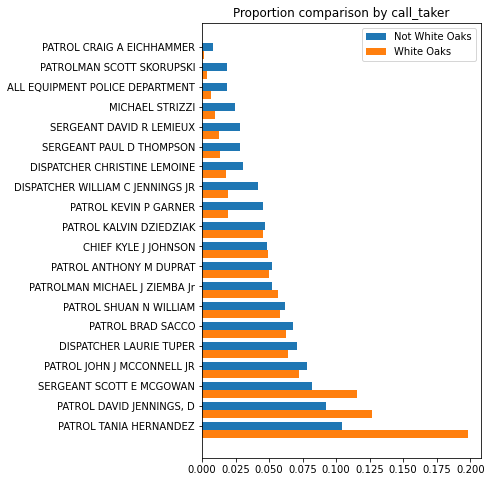

In [8]:
WOfunc.percentage_bar_chart(df,WhiteOaksdf,NotWhiteOaksdf,'call_taker');

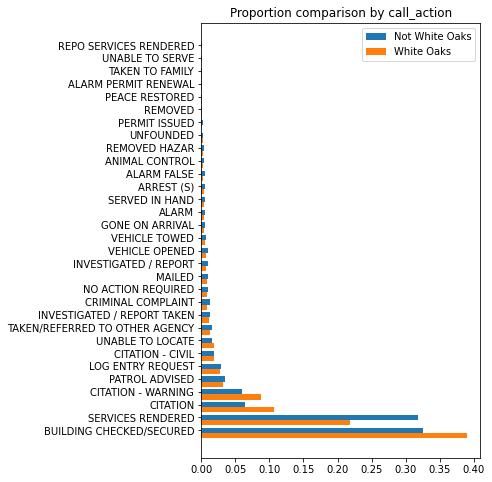

In [9]:
WOfunc.percentage_bar_chart(df,WhiteOaksdf,NotWhiteOaksdf,'call_action');

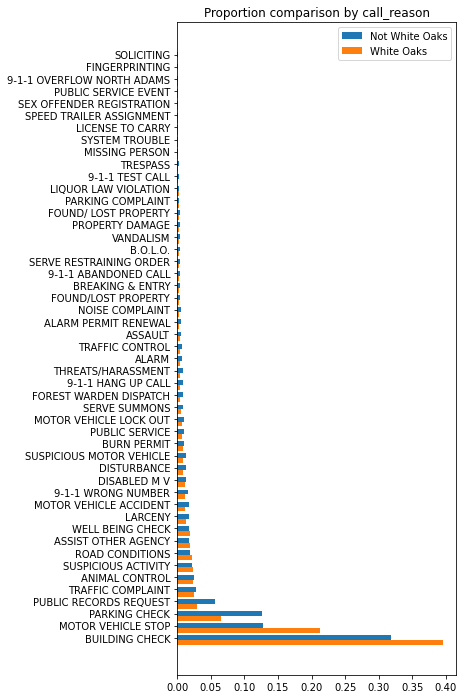

In [11]:
WOfunc.percentage_bar_chart(df,WhiteOaksdf,NotWhiteOaksdf,'call_reason',figsize=(5,12));

## Date trends

In [12]:

df.reset_index(drop = True, inplace = True);
WhiteOaksdf.reset_index(drop = True, inplace = True);
NotWhiteOaksdf.reset_index(drop = True, inplace = True);
for col in df.columns:
    if "date" in col:
        df[col] = pandas.to_datetime(df[col]);
        WhiteOaksdf[col] = pandas.to_datetime(WhiteOaksdf[col]);
        NotWhiteOaksdf[col] = pandas.to_datetime(NotWhiteOaksdf[col]);
        

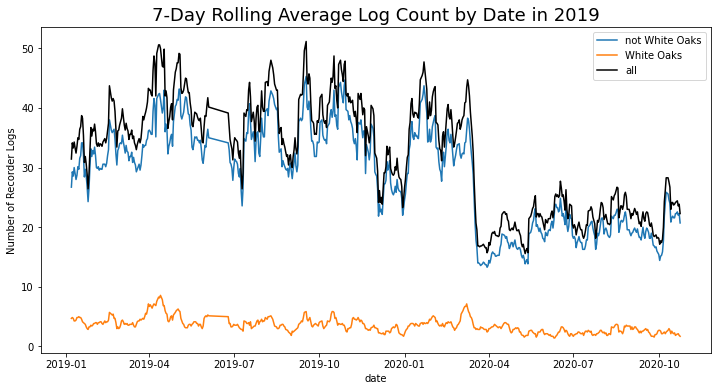

In [13]:
date_series = pandas.Series(df["date"].value_counts())
WO_date_series=pandas.Series(WhiteOaksdf["date"].value_counts())
notWO_date_series=pandas.Series(NotWhiteOaksdf["date"].value_counts())

date_series.sort_index(inplace = True)
WO_date_series.sort_index(inplace = True)
notWO_date_series.sort_index(inplace = True)

height_all = date_series.rolling(window = 7).mean().values
height_WO = WO_date_series.rolling(window = 7).mean().values
height_notWO = notWO_date_series.rolling(window = 7).mean().values
x_all = date_series.rolling(window = 7).mean().index
x_WO=WO_date_series.rolling(window = 7).mean().index
x_notWO=notWO_date_series.rolling(window = 7).mean().index
fig, ax = plt.subplots(figsize = (12,6))
ax.plot(x_notWO, height_notWO,label='not White Oaks')
ax.plot(x_WO, height_WO,label='White Oaks')
ax.plot(x_all, height_all, color = "black",label='all')
ax.set_xlabel("date")
ax.set_ylabel("Number of Recorder Logs")
ax.legend()

plt.title("7-Day Rolling Average Log Count by Date in 2019", fontsize = 18)
plt.show()

The COVID-19 drop in March 2020 does not seem to be as sharp in White Oaks. Is this related to the type of calls?

## Grouping officers and shifts

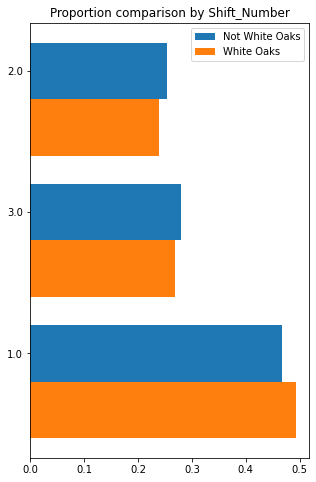

In [14]:
WOfunc.percentage_bar_chart(df,WhiteOaksdf,NotWhiteOaksdf,'Shift_Number');

In [15]:

officersWO=WOfunc.generate_officer_shift_distributions(WhiteOaksdf,'call_taker')


In [16]:
officersall=WOfunc.generate_officer_shift_distributions(df,'call_taker')

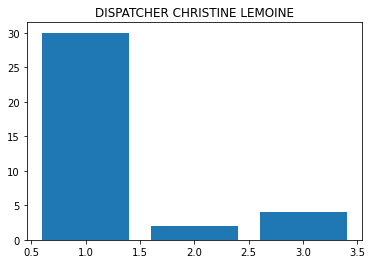

In [17]:
#can generate a histogram of shifts for any officer who appears in call_taker
key='DISPATCHER CHRISTINE LEMOINE'
plt.title('DISPATCHER CHRISTINE LEMOINE')
plt.bar([1,2,3],sum(officersWO['DISPATCHER CHRISTINE LEMOINE'],[]))
plt.show()